In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_PAC_method import GeNPAC, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=50)

# Target density #

In [4]:
loss= setup.loss
logprior=setup.logprior
n_data_samples=setup.n_samples
param_count=setup.param_count
model=setup._model
print(n_data_samples)

200


# AE-Variational Distribution #

In [97]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=50
GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

Epoch [0/20000], Bound: 74.27806854248047, Entropy: 134.24171447753906, Temp: 10.0, Learning Rate: 0.05


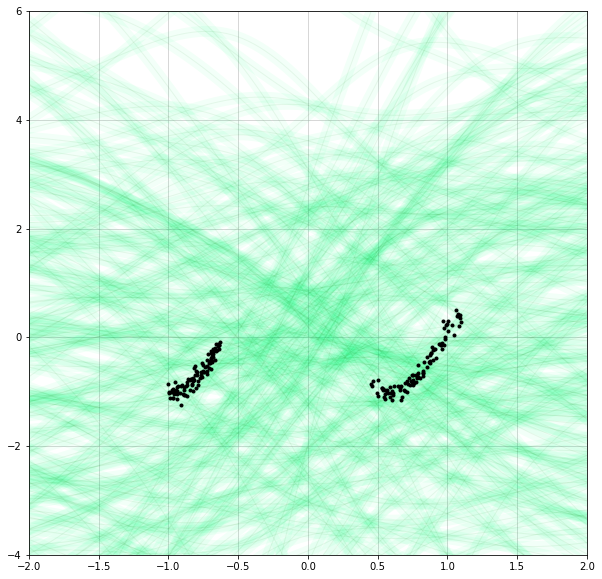

Epoch [1/20000], Bound: 182.3496856689453, Entropy: 150.1139678955078, Temp: 10.0, Learning Rate: 0.05
Epoch [2/20000], Bound: 356.48907470703125, Entropy: 159.99957275390625, Temp: 10.0, Learning Rate: 0.05
Epoch [3/20000], Bound: 170.5806121826172, Entropy: 168.69308471679688, Temp: 10.0, Learning Rate: 0.05
Epoch [4/20000], Bound: 201.91021728515625, Entropy: 173.1920623779297, Temp: 10.0, Learning Rate: 0.05
Epoch [5/20000], Bound: 135.58169555664062, Entropy: 179.62261962890625, Temp: 10.0, Learning Rate: 0.05
Epoch [6/20000], Bound: 173.91184997558594, Entropy: 183.96913146972656, Temp: 10.0, Learning Rate: 0.05
Epoch [7/20000], Bound: 119.7975082397461, Entropy: 190.240234375, Temp: 10.0, Learning Rate: 0.05
Epoch [8/20000], Bound: 182.72430419921875, Entropy: 194.1249542236328, Temp: 10.0, Learning Rate: 0.05
Epoch [9/20000], Bound: 113.9638900756836, Entropy: 194.53802490234375, Temp: 10.0, Learning Rate: 0.05
Epoch [10/20000], Bound: 139.3656768798828, Entropy: 201.30859375, 

Epoch [80/20000], Bound: 79.15373229980469, Entropy: 219.13873291015625, Temp: 10.0, Learning Rate: 0.05
Epoch [81/20000], Bound: 65.14684295654297, Entropy: 215.99554443359375, Temp: 10.0, Learning Rate: 0.05
Epoch [82/20000], Bound: 74.7005615234375, Entropy: 217.85633850097656, Temp: 10.0, Learning Rate: 0.05
Epoch [83/20000], Bound: 61.7673225402832, Entropy: 217.66835021972656, Temp: 10.0, Learning Rate: 0.05
Epoch [84/20000], Bound: 58.2528190612793, Entropy: 219.00741577148438, Temp: 10.0, Learning Rate: 0.05
Epoch [85/20000], Bound: 52.87345504760742, Entropy: 215.18170166015625, Temp: 10.0, Learning Rate: 0.05
Epoch [86/20000], Bound: 66.91571807861328, Entropy: 218.24842834472656, Temp: 10.0, Learning Rate: 0.05
Epoch [87/20000], Bound: 65.9224853515625, Entropy: 218.57760620117188, Temp: 10.0, Learning Rate: 0.05
Epoch [88/20000], Bound: 82.85065460205078, Entropy: 218.50030517578125, Temp: 10.0, Learning Rate: 0.05
Epoch [89/20000], Bound: 71.60256958007812, Entropy: 216.56

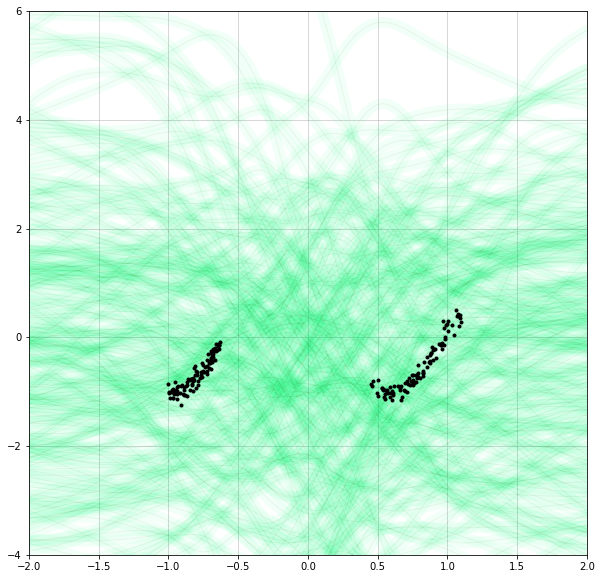

Epoch [101/20000], Bound: 58.57524871826172, Entropy: 213.83688354492188, Temp: 10.0, Learning Rate: 0.05
Epoch [102/20000], Bound: 54.658424377441406, Entropy: 214.41616821289062, Temp: 10.0, Learning Rate: 0.05
Epoch [103/20000], Bound: 38.650325775146484, Entropy: 212.31503295898438, Temp: 10.0, Learning Rate: 0.05
Epoch [104/20000], Bound: 42.665863037109375, Entropy: 216.00010681152344, Temp: 10.0, Learning Rate: 0.05
Epoch [105/20000], Bound: 53.25930404663086, Entropy: 214.06578063964844, Temp: 10.0, Learning Rate: 0.05
Epoch [106/20000], Bound: 42.86771774291992, Entropy: 213.53958129882812, Temp: 10.0, Learning Rate: 0.05
Epoch [107/20000], Bound: 50.409278869628906, Entropy: 212.8499298095703, Temp: 10.0, Learning Rate: 0.05
Epoch [108/20000], Bound: 43.01612091064453, Entropy: 213.0594940185547, Temp: 10.0, Learning Rate: 0.05
Epoch [109/20000], Bound: 47.01546096801758, Entropy: 212.83612060546875, Temp: 10.0, Learning Rate: 0.05
Epoch [110/20000], Bound: 46.81397247314453,

Epoch [180/20000], Bound: 28.762310028076172, Entropy: 196.489501953125, Temp: 10.0, Learning Rate: 0.05
Epoch [181/20000], Bound: 36.49494171142578, Entropy: 195.3155059814453, Temp: 10.0, Learning Rate: 0.05
Epoch [182/20000], Bound: 34.52539825439453, Entropy: 194.8489227294922, Temp: 10.0, Learning Rate: 0.05
Epoch [183/20000], Bound: 31.194555282592773, Entropy: 194.12542724609375, Temp: 10.0, Learning Rate: 0.05
Epoch [184/20000], Bound: 27.59929656982422, Entropy: 195.20956420898438, Temp: 10.0, Learning Rate: 0.05
Epoch [185/20000], Bound: 24.82799530029297, Entropy: 193.31454467773438, Temp: 10.0, Learning Rate: 0.05
Epoch [186/20000], Bound: 27.447616577148438, Entropy: 193.71058654785156, Temp: 10.0, Learning Rate: 0.05
Epoch [187/20000], Bound: 18.963924407958984, Entropy: 193.195068359375, Temp: 10.0, Learning Rate: 0.05
Epoch [188/20000], Bound: 25.15648651123047, Entropy: 194.308349609375, Temp: 10.0, Learning Rate: 0.05
Epoch [189/20000], Bound: 29.58655548095703, Entro

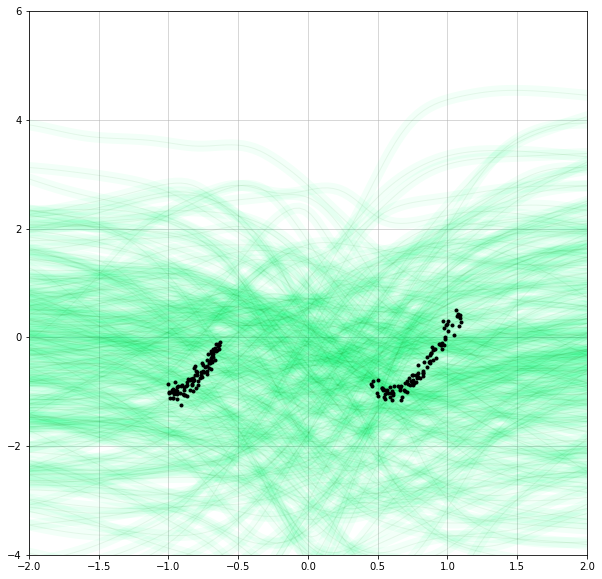

Epoch [201/20000], Bound: 26.694931030273438, Entropy: 188.4052734375, Temp: 10.0, Learning Rate: 0.05
Epoch [202/20000], Bound: 26.040794372558594, Entropy: 189.47727966308594, Temp: 10.0, Learning Rate: 0.05
Epoch [203/20000], Bound: 24.292930603027344, Entropy: 188.22154235839844, Temp: 10.0, Learning Rate: 0.05
Epoch [204/20000], Bound: 25.03464126586914, Entropy: 188.83607482910156, Temp: 10.0, Learning Rate: 0.05
Epoch [205/20000], Bound: 23.71487808227539, Entropy: 188.204345703125, Temp: 10.0, Learning Rate: 0.05
Epoch [206/20000], Bound: 24.237485885620117, Entropy: 185.6658935546875, Temp: 10.0, Learning Rate: 0.05
Epoch [207/20000], Bound: 21.24538803100586, Entropy: 188.40554809570312, Temp: 10.0, Learning Rate: 0.05
Epoch [208/20000], Bound: 23.605600357055664, Entropy: 186.855712890625, Temp: 10.0, Learning Rate: 0.05
Epoch [209/20000], Bound: 23.648193359375, Entropy: 182.53224182128906, Temp: 10.0, Learning Rate: 0.05
Epoch [210/20000], Bound: 23.61844253540039, Entropy

Epoch [284/20000], Bound: 16.143531799316406, Entropy: 164.24659729003906, Temp: 10.0, Learning Rate: 0.05
Epoch [285/20000], Bound: 14.626899719238281, Entropy: 164.80247497558594, Temp: 10.0, Learning Rate: 0.05
Epoch [286/20000], Bound: 15.302994728088379, Entropy: 161.99874877929688, Temp: 10.0, Learning Rate: 0.05
Epoch [287/20000], Bound: 15.597336769104004, Entropy: 161.34515380859375, Temp: 10.0, Learning Rate: 0.05
Epoch [288/20000], Bound: 15.977453231811523, Entropy: 160.40975952148438, Temp: 10.0, Learning Rate: 0.05
Epoch [289/20000], Bound: 12.50366497039795, Entropy: 159.55203247070312, Temp: 10.0, Learning Rate: 0.05
Epoch [290/20000], Bound: 17.853260040283203, Entropy: 158.7880096435547, Temp: 10.0, Learning Rate: 0.05
Epoch [291/20000], Bound: 21.075279235839844, Entropy: 157.63504028320312, Temp: 10.0, Learning Rate: 0.05
Epoch [292/20000], Bound: 13.5823392868042, Entropy: 158.84231567382812, Temp: 10.0, Learning Rate: 0.05
Epoch [293/20000], Bound: 15.358469009399

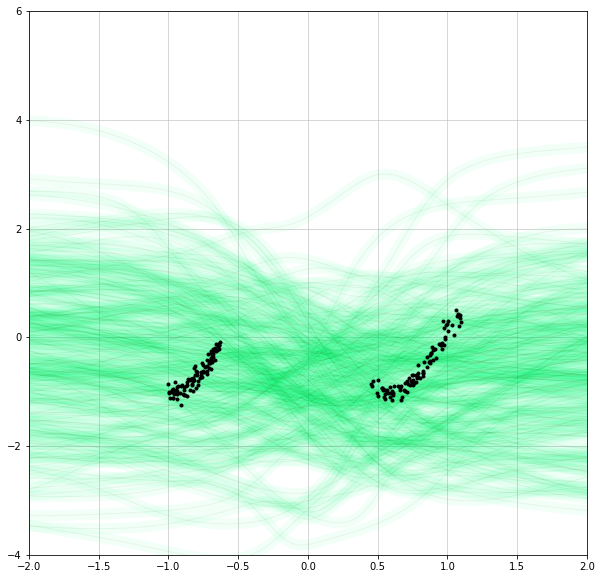

Epoch [301/20000], Bound: 14.069257736206055, Entropy: 159.79847717285156, Temp: 10.0, Learning Rate: 0.05
Epoch [302/20000], Bound: 15.055811882019043, Entropy: 157.35043334960938, Temp: 10.0, Learning Rate: 0.05
Epoch [303/20000], Bound: 12.126022338867188, Entropy: 154.83908081054688, Temp: 10.0, Learning Rate: 0.05
Epoch [304/20000], Bound: 14.877847671508789, Entropy: 156.51934814453125, Temp: 10.0, Learning Rate: 0.05
Epoch [305/20000], Bound: 16.8784122467041, Entropy: 158.65689086914062, Temp: 10.0, Learning Rate: 0.05
Epoch [306/20000], Bound: 13.198243141174316, Entropy: 158.4796600341797, Temp: 10.0, Learning Rate: 0.05
Epoch [307/20000], Bound: 13.953462600708008, Entropy: 155.64439392089844, Temp: 10.0, Learning Rate: 0.05
Epoch [308/20000], Bound: 14.322582244873047, Entropy: 156.44415283203125, Temp: 10.0, Learning Rate: 0.05
Epoch [309/20000], Bound: 12.308679580688477, Entropy: 154.12559509277344, Temp: 10.0, Learning Rate: 0.05
Epoch [310/20000], Bound: 16.68358612060

Epoch [389/20000], Bound: 6.37865686416626, Entropy: 112.06521606445312, Temp: 10.0, Learning Rate: 0.05
Epoch [390/20000], Bound: 5.97728157043457, Entropy: 115.34801483154297, Temp: 10.0, Learning Rate: 0.05
Epoch [391/20000], Bound: 6.114511966705322, Entropy: 111.49179077148438, Temp: 10.0, Learning Rate: 0.05
Epoch [392/20000], Bound: 5.565618991851807, Entropy: 113.10533142089844, Temp: 10.0, Learning Rate: 0.05
Epoch [393/20000], Bound: 5.871252059936523, Entropy: 111.46906280517578, Temp: 10.0, Learning Rate: 0.05
Epoch [394/20000], Bound: 6.066677570343018, Entropy: 112.36839294433594, Temp: 10.0, Learning Rate: 0.05
Epoch [395/20000], Bound: 5.133583068847656, Entropy: 110.27052307128906, Temp: 10.0, Learning Rate: 0.05
Epoch [396/20000], Bound: 5.651872158050537, Entropy: 112.11833953857422, Temp: 10.0, Learning Rate: 0.05
Epoch [397/20000], Bound: 6.23418664932251, Entropy: 110.2201156616211, Temp: 10.0, Learning Rate: 0.05
Epoch [398/20000], Bound: 5.737388610839844, Entro

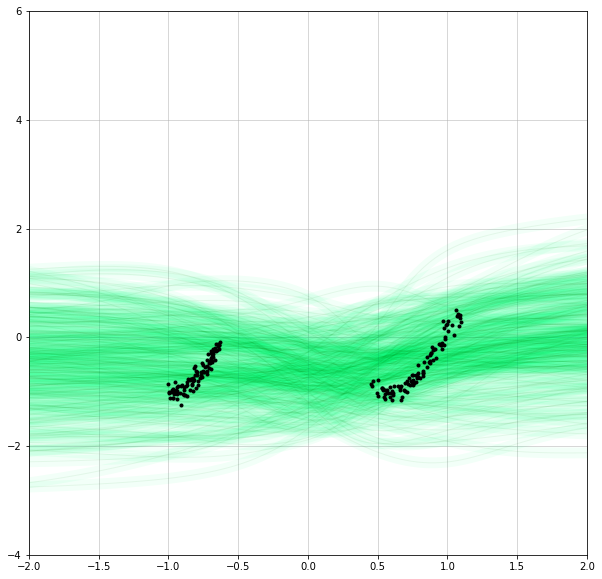

Epoch [401/20000], Bound: 5.6155805587768555, Entropy: 106.83558654785156, Temp: 10.0, Learning Rate: 0.05
Epoch [402/20000], Bound: 5.182415008544922, Entropy: 105.42481994628906, Temp: 10.0, Learning Rate: 0.05
Epoch [403/20000], Bound: 4.430887222290039, Entropy: 108.7647705078125, Temp: 10.0, Learning Rate: 0.05
Epoch [404/20000], Bound: 6.22967004776001, Entropy: 104.69252014160156, Temp: 10.0, Learning Rate: 0.05
Epoch [405/20000], Bound: 5.156508445739746, Entropy: 107.49530792236328, Temp: 10.0, Learning Rate: 0.05
Epoch [406/20000], Bound: 5.50070858001709, Entropy: 104.83840942382812, Temp: 10.0, Learning Rate: 0.05
Epoch [407/20000], Bound: 4.97916316986084, Entropy: 102.72298431396484, Temp: 10.0, Learning Rate: 0.05
Epoch [408/20000], Bound: 4.528530597686768, Entropy: 98.80437469482422, Temp: 10.0, Learning Rate: 0.05
Epoch [409/20000], Bound: 4.727813243865967, Entropy: 102.48854064941406, Temp: 10.0, Learning Rate: 0.05
Epoch [410/20000], Bound: 4.7508111000061035, Entr

Epoch [479/20000], Bound: 3.0943381786346436, Entropy: 82.08981323242188, Temp: 10.0, Learning Rate: 0.05
Epoch [480/20000], Bound: 2.871117115020752, Entropy: 82.29364776611328, Temp: 10.0, Learning Rate: 0.05
Epoch [481/20000], Bound: 3.159151315689087, Entropy: 82.11216735839844, Temp: 10.0, Learning Rate: 0.05
Epoch [482/20000], Bound: 3.1488189697265625, Entropy: 82.19486999511719, Temp: 10.0, Learning Rate: 0.05
Epoch [483/20000], Bound: 2.708885669708252, Entropy: 78.15316009521484, Temp: 10.0, Learning Rate: 0.05
Epoch [484/20000], Bound: 3.0334904193878174, Entropy: 80.16141510009766, Temp: 10.0, Learning Rate: 0.05
Epoch [485/20000], Bound: 3.2245254516601562, Entropy: 83.18879699707031, Temp: 10.0, Learning Rate: 0.05
Epoch [486/20000], Bound: 3.2181992530822754, Entropy: 79.72853088378906, Temp: 10.0, Learning Rate: 0.05
Epoch [487/20000], Bound: 2.653348207473755, Entropy: 81.87337493896484, Temp: 10.0, Learning Rate: 0.05
Epoch [488/20000], Bound: 3.137247085571289, Entro

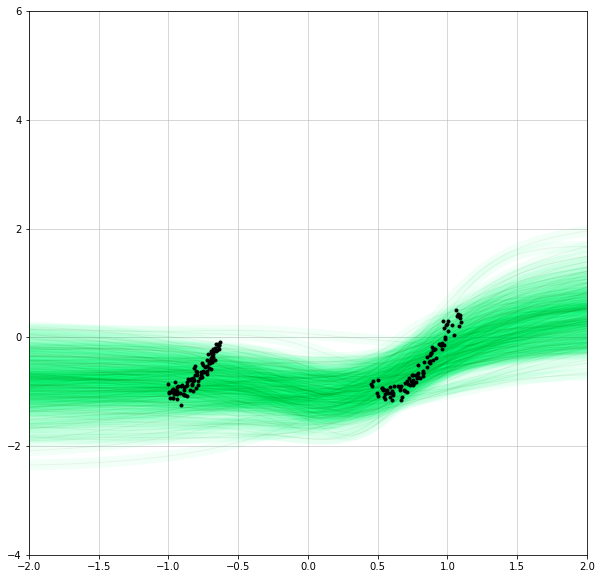

Epoch [501/20000], Bound: 2.761514902114868, Entropy: 79.89026641845703, Temp: 10.0, Learning Rate: 0.05
Epoch [502/20000], Bound: 2.8383774757385254, Entropy: 80.2927017211914, Temp: 10.0, Learning Rate: 0.05
Epoch [503/20000], Bound: 3.1387410163879395, Entropy: 80.9577407836914, Temp: 10.0, Learning Rate: 0.05
Epoch [504/20000], Bound: 2.7837328910827637, Entropy: 77.8720474243164, Temp: 10.0, Learning Rate: 0.05
Epoch [505/20000], Bound: 2.7088890075683594, Entropy: 81.43169403076172, Temp: 10.0, Learning Rate: 0.05
Epoch [506/20000], Bound: 2.99694561958313, Entropy: 80.15998840332031, Temp: 10.0, Learning Rate: 0.05
Epoch [507/20000], Bound: 2.9701642990112305, Entropy: 81.05916595458984, Temp: 10.0, Learning Rate: 0.05
Epoch [508/20000], Bound: 2.7278308868408203, Entropy: 79.1082763671875, Temp: 10.0, Learning Rate: 0.05
Epoch [509/20000], Bound: 2.847579002380371, Entropy: 80.83718872070312, Temp: 10.0, Learning Rate: 0.05
Epoch [510/20000], Bound: 3.0127809047698975, Entropy:

Epoch [581/20000], Bound: 2.0913524627685547, Entropy: 75.82015991210938, Temp: 10.0, Learning Rate: 0.05
Epoch [582/20000], Bound: 2.195189952850342, Entropy: 72.47725677490234, Temp: 10.0, Learning Rate: 0.05
Epoch [583/20000], Bound: 1.9475414752960205, Entropy: 74.55130004882812, Temp: 10.0, Learning Rate: 0.05
Epoch [584/20000], Bound: 2.152750253677368, Entropy: 74.95458221435547, Temp: 10.0, Learning Rate: 0.05
Epoch [585/20000], Bound: 1.9703259468078613, Entropy: 75.0498046875, Temp: 10.0, Learning Rate: 0.05
Epoch [586/20000], Bound: 2.1117420196533203, Entropy: 73.66752624511719, Temp: 10.0, Learning Rate: 0.05
Epoch [587/20000], Bound: 2.1022543907165527, Entropy: 73.78832244873047, Temp: 10.0, Learning Rate: 0.05
Epoch [588/20000], Bound: 2.003296136856079, Entropy: 71.98538970947266, Temp: 10.0, Learning Rate: 0.05
Epoch [589/20000], Bound: 2.030648708343506, Entropy: 75.41482543945312, Temp: 10.0, Learning Rate: 0.05
Epoch [590/20000], Bound: 2.09228515625, Entropy: 73.6

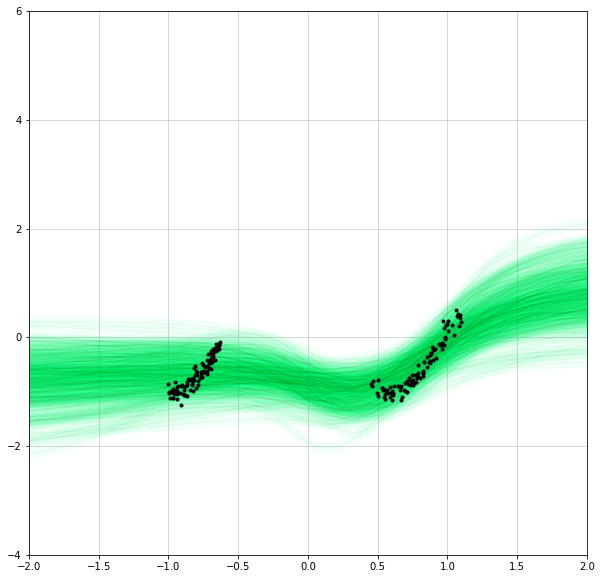

Epoch [601/20000], Bound: 2.2237205505371094, Entropy: 71.04743957519531, Temp: 10.0, Learning Rate: 0.05
Epoch [602/20000], Bound: 2.0226621627807617, Entropy: 70.4758529663086, Temp: 10.0, Learning Rate: 0.05
Epoch [603/20000], Bound: 2.151405096054077, Entropy: 73.41163635253906, Temp: 10.0, Learning Rate: 0.05
Epoch [604/20000], Bound: 2.1175098419189453, Entropy: 72.44829559326172, Temp: 10.0, Learning Rate: 0.05
Epoch [605/20000], Bound: 1.9497944116592407, Entropy: 73.38582611083984, Temp: 10.0, Learning Rate: 0.05
Epoch [606/20000], Bound: 1.9804768562316895, Entropy: 71.09640502929688, Temp: 10.0, Learning Rate: 0.05
Epoch [607/20000], Bound: 2.0734939575195312, Entropy: 69.91948699951172, Temp: 10.0, Learning Rate: 0.05
Epoch [608/20000], Bound: 2.111309289932251, Entropy: 71.50774383544922, Temp: 10.0, Learning Rate: 0.05
Epoch [609/20000], Bound: 1.9845250844955444, Entropy: 70.62549591064453, Temp: 10.0, Learning Rate: 0.05
Epoch [610/20000], Bound: 1.9747464656829834, Ent

Epoch [687/20000], Bound: 1.8381280899047852, Entropy: 71.5964126586914, Temp: 10.0, Learning Rate: 0.05
Epoch [688/20000], Bound: 1.8769804239273071, Entropy: 69.77253723144531, Temp: 10.0, Learning Rate: 0.05
Epoch [689/20000], Bound: 1.8745057582855225, Entropy: 72.76262664794922, Temp: 10.0, Learning Rate: 0.05
Epoch [690/20000], Bound: 1.9496725797653198, Entropy: 72.07933807373047, Temp: 10.0, Learning Rate: 0.05
Epoch [691/20000], Bound: 2.1451592445373535, Entropy: 70.30714416503906, Temp: 10.0, Learning Rate: 0.05
Epoch [692/20000], Bound: 1.885021448135376, Entropy: 70.88197326660156, Temp: 10.0, Learning Rate: 0.05
Epoch [693/20000], Bound: 1.889330267906189, Entropy: 71.27123260498047, Temp: 10.0, Learning Rate: 0.05
Epoch [694/20000], Bound: 1.9492944478988647, Entropy: 71.53073120117188, Temp: 10.0, Learning Rate: 0.05
Epoch [695/20000], Bound: 2.058669090270996, Entropy: 72.24007415771484, Temp: 10.0, Learning Rate: 0.05
Epoch [696/20000], Bound: 1.892969012260437, Entro

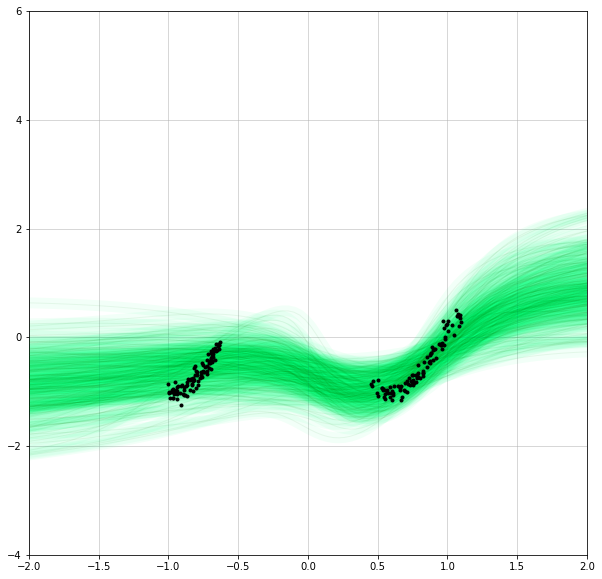

Epoch [701/20000], Bound: 2.0370583534240723, Entropy: 71.3685302734375, Temp: 10.0, Learning Rate: 0.05
Epoch [702/20000], Bound: 1.9458314180374146, Entropy: 70.01220703125, Temp: 10.0, Learning Rate: 0.05
Epoch [703/20000], Bound: 1.9125514030456543, Entropy: 70.89559936523438, Temp: 10.0, Learning Rate: 0.05
Epoch [704/20000], Bound: 1.7654409408569336, Entropy: 69.94280242919922, Temp: 10.0, Learning Rate: 0.05
Epoch [705/20000], Bound: 1.9584956169128418, Entropy: 73.57170867919922, Temp: 10.0, Learning Rate: 0.05
Epoch [706/20000], Bound: 2.038590908050537, Entropy: 73.26888275146484, Temp: 10.0, Learning Rate: 0.05
Epoch [707/20000], Bound: 1.8520755767822266, Entropy: 72.22661590576172, Temp: 10.0, Learning Rate: 0.05
Epoch [708/20000], Bound: 1.916076898574829, Entropy: 70.48453521728516, Temp: 10.0, Learning Rate: 0.05
Epoch [709/20000], Bound: 1.7785495519638062, Entropy: 71.68346405029297, Temp: 10.0, Learning Rate: 0.05
Epoch [710/20000], Bound: 1.7715126276016235, Entrop

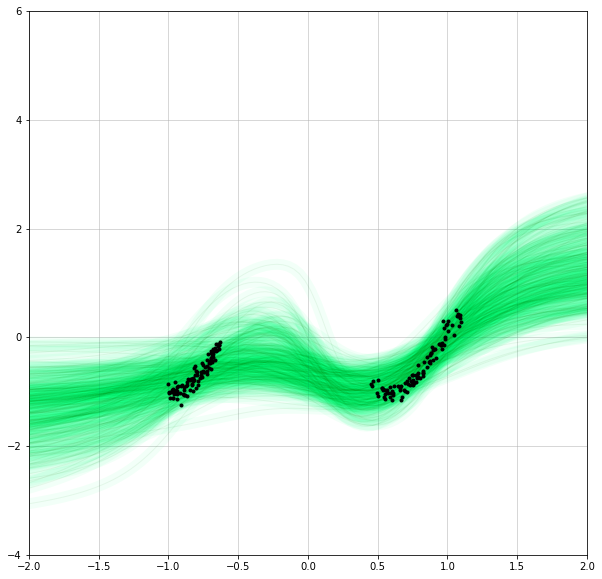

Epoch [801/20000], Bound: 2.052856922149658, Entropy: 71.7846450805664, Temp: 10.0, Learning Rate: 0.05
Epoch [802/20000], Bound: 1.637265682220459, Entropy: 68.42890167236328, Temp: 10.0, Learning Rate: 0.05
Epoch [803/20000], Bound: 1.7042902708053589, Entropy: 69.56299591064453, Temp: 10.0, Learning Rate: 0.05
Epoch [804/20000], Bound: 1.6303532123565674, Entropy: 69.99394989013672, Temp: 10.0, Learning Rate: 0.05
Epoch [805/20000], Bound: 1.711473822593689, Entropy: 67.71665954589844, Temp: 10.0, Learning Rate: 0.05
Epoch [806/20000], Bound: 1.8574292659759521, Entropy: 67.8376235961914, Temp: 10.0, Learning Rate: 0.05
Epoch [807/20000], Bound: 1.9734169244766235, Entropy: 69.28174591064453, Temp: 10.0, Learning Rate: 0.05
Epoch [808/20000], Bound: 1.9472229480743408, Entropy: 71.86286163330078, Temp: 10.0, Learning Rate: 0.05
Epoch [809/20000], Bound: 1.7706807851791382, Entropy: 72.55435180664062, Temp: 10.0, Learning Rate: 0.05
Epoch [810/20000], Bound: 1.7013766765594482, Entro

Epoch [889/20000], Bound: 1.7003984451293945, Entropy: 68.78560638427734, Temp: 10.0, Learning Rate: 0.05
Epoch [890/20000], Bound: 1.8205020427703857, Entropy: 70.7384262084961, Temp: 10.0, Learning Rate: 0.05
Epoch [891/20000], Bound: 1.7644535303115845, Entropy: 71.18519592285156, Temp: 10.0, Learning Rate: 0.05
Epoch [892/20000], Bound: 1.54490327835083, Entropy: 68.31959533691406, Temp: 10.0, Learning Rate: 0.05
Epoch [893/20000], Bound: 1.6080567836761475, Entropy: 67.93778228759766, Temp: 10.0, Learning Rate: 0.05
Epoch [894/20000], Bound: 1.595456838607788, Entropy: 69.23355102539062, Temp: 10.0, Learning Rate: 0.05
Epoch [895/20000], Bound: 1.8130018711090088, Entropy: 68.31127166748047, Temp: 10.0, Learning Rate: 0.05
Epoch [896/20000], Bound: 1.688288688659668, Entropy: 70.40052795410156, Temp: 10.0, Learning Rate: 0.05
Epoch [897/20000], Bound: 1.5956380367279053, Entropy: 68.73197174072266, Temp: 10.0, Learning Rate: 0.05
Epoch [898/20000], Bound: 1.7338075637817383, Entro

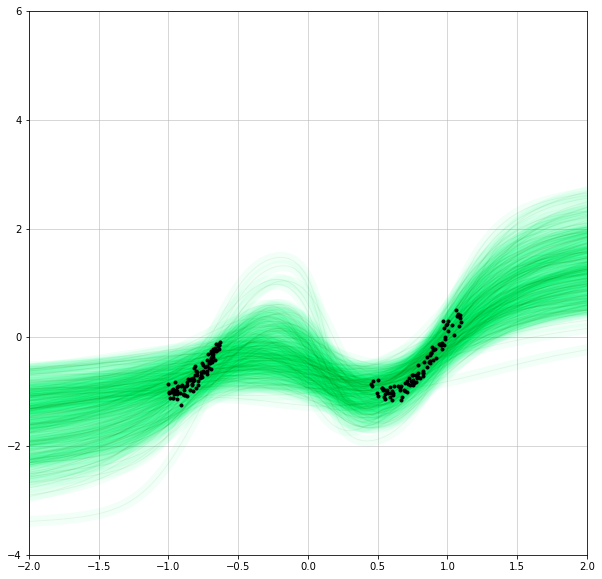

Epoch [901/20000], Bound: 1.6283619403839111, Entropy: 70.19599151611328, Temp: 10.0, Learning Rate: 0.05
Epoch [902/20000], Bound: 1.5388970375061035, Entropy: 69.00309753417969, Temp: 10.0, Learning Rate: 0.05
Epoch [903/20000], Bound: 1.6197350025177002, Entropy: 71.58647918701172, Temp: 10.0, Learning Rate: 0.05
Epoch [904/20000], Bound: 1.5736017227172852, Entropy: 69.57499694824219, Temp: 10.0, Learning Rate: 0.05
Epoch [905/20000], Bound: 1.6593518257141113, Entropy: 71.1776123046875, Temp: 10.0, Learning Rate: 0.05
Epoch [906/20000], Bound: 1.6360890865325928, Entropy: 69.65084838867188, Temp: 10.0, Learning Rate: 0.05
Epoch [907/20000], Bound: 1.5601136684417725, Entropy: 70.56015014648438, Temp: 10.0, Learning Rate: 0.05
Epoch [908/20000], Bound: 1.7647459506988525, Entropy: 72.3970718383789, Temp: 10.0, Learning Rate: 0.05
Epoch [909/20000], Bound: 1.7462751865386963, Entropy: 71.02433013916016, Temp: 10.0, Learning Rate: 0.05
Epoch [910/20000], Bound: 1.6344106197357178, En

Epoch [981/20000], Bound: 1.6873193979263306, Entropy: 70.19075012207031, Temp: 10.0, Learning Rate: 0.05
Epoch [982/20000], Bound: 1.520204782485962, Entropy: 70.28197479248047, Temp: 10.0, Learning Rate: 0.05
Epoch [983/20000], Bound: 1.545161485671997, Entropy: 70.23210906982422, Temp: 10.0, Learning Rate: 0.05
Epoch [984/20000], Bound: 1.5710313320159912, Entropy: 71.47015380859375, Temp: 10.0, Learning Rate: 0.05
Epoch [985/20000], Bound: 1.6187824010849, Entropy: 68.92606353759766, Temp: 10.0, Learning Rate: 0.05
Epoch [986/20000], Bound: 1.461611270904541, Entropy: 69.43370819091797, Temp: 10.0, Learning Rate: 0.05
Epoch [987/20000], Bound: 1.5977694988250732, Entropy: 69.62859344482422, Temp: 10.0, Learning Rate: 0.05
Epoch [988/20000], Bound: 1.611557960510254, Entropy: 66.79492950439453, Temp: 10.0, Learning Rate: 0.05
Epoch [989/20000], Bound: 1.4966660737991333, Entropy: 70.4963150024414, Temp: 10.0, Learning Rate: 0.05
Epoch [990/20000], Bound: 1.4944932460784912, Entropy:

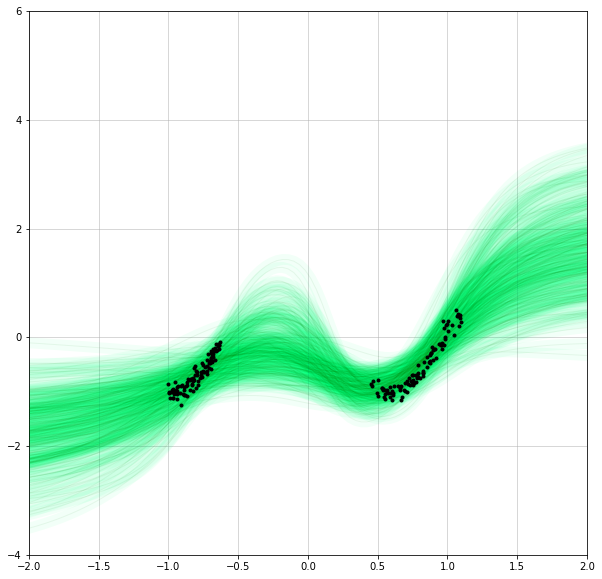

Epoch [1001/20000], Bound: 1.5357027053833008, Entropy: 70.99917602539062, Temp: 10.0, Learning Rate: 0.05
Epoch [1002/20000], Bound: 1.6159720420837402, Entropy: 70.21517181396484, Temp: 10.0, Learning Rate: 0.05
Epoch [1003/20000], Bound: 1.6362886428833008, Entropy: 71.85425567626953, Temp: 10.0, Learning Rate: 0.05
Epoch [1004/20000], Bound: 1.5200343132019043, Entropy: 67.90691375732422, Temp: 10.0, Learning Rate: 0.05
Epoch [1005/20000], Bound: 1.4975388050079346, Entropy: 71.38998413085938, Temp: 10.0, Learning Rate: 0.05
Epoch [1006/20000], Bound: 1.7121691703796387, Entropy: 69.94386291503906, Temp: 10.0, Learning Rate: 0.05
Epoch [1007/20000], Bound: 1.7659481763839722, Entropy: 71.49827575683594, Temp: 10.0, Learning Rate: 0.05
Epoch [1008/20000], Bound: 1.6686780452728271, Entropy: 69.60160827636719, Temp: 10.0, Learning Rate: 0.05
Epoch [1009/20000], Bound: 1.6409637928009033, Entropy: 70.62686157226562, Temp: 10.0, Learning Rate: 0.05
Epoch [1010/20000], Bound: 1.59436130

Epoch [1085/20000], Bound: 1.7002108097076416, Entropy: 69.23818969726562, Temp: 10.0, Learning Rate: 0.05
Epoch [1086/20000], Bound: 1.5653417110443115, Entropy: 70.8990249633789, Temp: 10.0, Learning Rate: 0.05
Epoch [1087/20000], Bound: 1.5416982173919678, Entropy: 68.79999542236328, Temp: 10.0, Learning Rate: 0.05
Epoch [1088/20000], Bound: 1.585337519645691, Entropy: 71.45671844482422, Temp: 10.0, Learning Rate: 0.05
Epoch [1089/20000], Bound: 1.4769294261932373, Entropy: 69.80863952636719, Temp: 10.0, Learning Rate: 0.05
Epoch [1090/20000], Bound: 1.6919960975646973, Entropy: 70.55406951904297, Temp: 10.0, Learning Rate: 0.05
Epoch [1091/20000], Bound: 1.5762364864349365, Entropy: 69.90452575683594, Temp: 10.0, Learning Rate: 0.05
Epoch [1092/20000], Bound: 1.4745651483535767, Entropy: 68.31230926513672, Temp: 10.0, Learning Rate: 0.05
Epoch [1093/20000], Bound: 1.6296591758728027, Entropy: 70.68928527832031, Temp: 10.0, Learning Rate: 0.05
Epoch [1094/20000], Bound: 1.5780898332

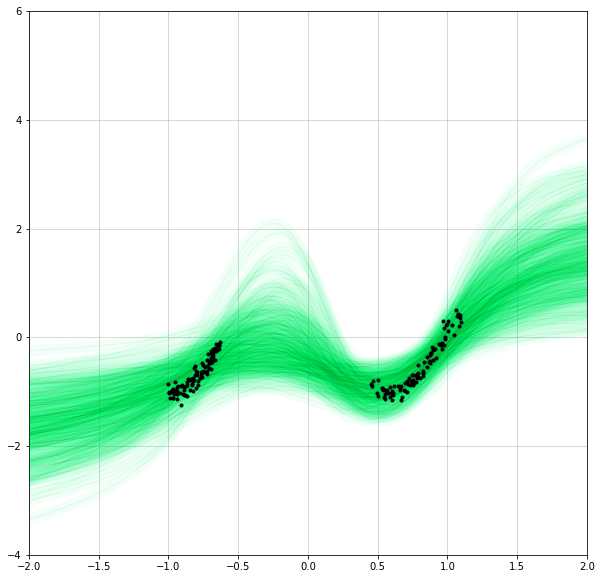

Epoch [1101/20000], Bound: 1.4347779750823975, Entropy: 71.60059356689453, Temp: 10.0, Learning Rate: 0.05
Epoch [1102/20000], Bound: 1.5963306427001953, Entropy: 70.60833740234375, Temp: 10.0, Learning Rate: 0.05
Epoch [1103/20000], Bound: 1.463748812675476, Entropy: 71.67162322998047, Temp: 10.0, Learning Rate: 0.05
Epoch [1104/20000], Bound: 1.474421739578247, Entropy: 69.64413452148438, Temp: 10.0, Learning Rate: 0.05
Epoch [1105/20000], Bound: 1.3812469244003296, Entropy: 69.32418060302734, Temp: 10.0, Learning Rate: 0.05
Epoch [1106/20000], Bound: 1.4345932006835938, Entropy: 72.84732055664062, Temp: 10.0, Learning Rate: 0.05
Epoch [1107/20000], Bound: 1.4881160259246826, Entropy: 69.67361450195312, Temp: 10.0, Learning Rate: 0.05
Epoch [1108/20000], Bound: 1.4914624691009521, Entropy: 72.06221771240234, Temp: 10.0, Learning Rate: 0.05
Epoch [1109/20000], Bound: 1.5191068649291992, Entropy: 72.96993255615234, Temp: 10.0, Learning Rate: 0.05
Epoch [1110/20000], Bound: 1.4840621948

Epoch [1189/20000], Bound: 1.3811719417572021, Entropy: 70.37020111083984, Temp: 10.0, Learning Rate: 0.05
Epoch [1190/20000], Bound: 1.3559513092041016, Entropy: 68.28478240966797, Temp: 10.0, Learning Rate: 0.05
Epoch [1191/20000], Bound: 1.3580549955368042, Entropy: 71.75636291503906, Temp: 10.0, Learning Rate: 0.05
Epoch [1192/20000], Bound: 1.356421947479248, Entropy: 73.08673095703125, Temp: 10.0, Learning Rate: 0.05
Epoch [1193/20000], Bound: 1.4601366519927979, Entropy: 72.95777130126953, Temp: 10.0, Learning Rate: 0.05
Epoch [1194/20000], Bound: 1.326786994934082, Entropy: 70.09593963623047, Temp: 10.0, Learning Rate: 0.05
Epoch [1195/20000], Bound: 1.3126990795135498, Entropy: 69.39043426513672, Temp: 10.0, Learning Rate: 0.05
Epoch [1196/20000], Bound: 1.3151074647903442, Entropy: 71.33513641357422, Temp: 10.0, Learning Rate: 0.05
Epoch [1197/20000], Bound: 1.429032325744629, Entropy: 73.91108703613281, Temp: 10.0, Learning Rate: 0.05
Epoch [1198/20000], Bound: 1.49884009361

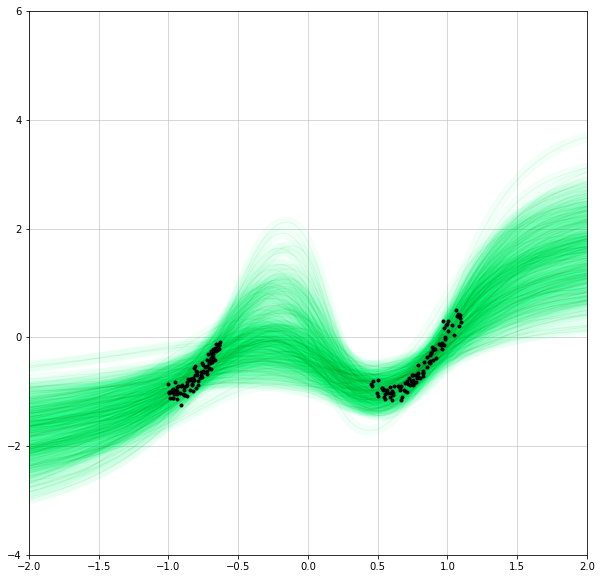

Epoch [1201/20000], Bound: 1.244382619857788, Entropy: 71.1521987915039, Temp: 10.0, Learning Rate: 0.05
Epoch [1202/20000], Bound: 1.3403632640838623, Entropy: 72.3184585571289, Temp: 10.0, Learning Rate: 0.05
Epoch [1203/20000], Bound: 1.3824580907821655, Entropy: 71.86884307861328, Temp: 10.0, Learning Rate: 0.05
Epoch [1204/20000], Bound: 1.329182505607605, Entropy: 71.112548828125, Temp: 10.0, Learning Rate: 0.05
Epoch [1205/20000], Bound: 1.3191914558410645, Entropy: 70.05657196044922, Temp: 10.0, Learning Rate: 0.05
Epoch [1206/20000], Bound: 1.397768259048462, Entropy: 72.34272003173828, Temp: 10.0, Learning Rate: 0.05
Epoch [1207/20000], Bound: 1.323204517364502, Entropy: 70.45990753173828, Temp: 10.0, Learning Rate: 0.05
Epoch [1208/20000], Bound: 1.394383192062378, Entropy: 72.05671691894531, Temp: 10.0, Learning Rate: 0.05
Epoch [1209/20000], Bound: 1.333144187927246, Entropy: 70.10003662109375, Temp: 10.0, Learning Rate: 0.05
Epoch [1210/20000], Bound: 1.346343755722046, E

Epoch [1292/20000], Bound: 1.2429296970367432, Entropy: 72.8858642578125, Temp: 10.0, Learning Rate: 0.05
Epoch [1293/20000], Bound: 1.1780312061309814, Entropy: 73.94005584716797, Temp: 10.0, Learning Rate: 0.05
Epoch [1294/20000], Bound: 1.2280371189117432, Entropy: 75.71482849121094, Temp: 10.0, Learning Rate: 0.05
Epoch [1295/20000], Bound: 1.2207690477371216, Entropy: 73.50865173339844, Temp: 10.0, Learning Rate: 0.05
Epoch [1296/20000], Bound: 1.236076831817627, Entropy: 74.69993591308594, Temp: 10.0, Learning Rate: 0.05
Epoch [1297/20000], Bound: 1.2173724174499512, Entropy: 74.51232147216797, Temp: 10.0, Learning Rate: 0.05
Epoch [1298/20000], Bound: 1.1349226236343384, Entropy: 76.27322387695312, Temp: 10.0, Learning Rate: 0.05
Epoch [1299/20000], Bound: 1.1831004619598389, Entropy: 73.296875, Temp: 10.0, Learning Rate: 0.05
Epoch [1300/20000], Bound: 1.2409207820892334, Entropy: 75.429931640625, Temp: 10.0, Learning Rate: 0.05


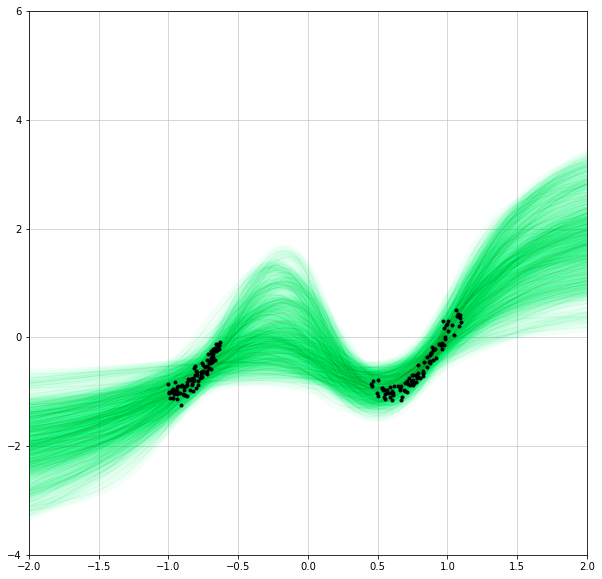

Epoch [1301/20000], Bound: 1.18373441696167, Entropy: 74.22708129882812, Temp: 10.0, Learning Rate: 0.05
Epoch [1302/20000], Bound: 1.2997891902923584, Entropy: 73.33154296875, Temp: 10.0, Learning Rate: 0.05
Epoch [1303/20000], Bound: 1.1855368614196777, Entropy: 75.69647979736328, Temp: 10.0, Learning Rate: 0.05
Epoch [1304/20000], Bound: 1.2204885482788086, Entropy: 77.58858489990234, Temp: 10.0, Learning Rate: 0.05
Epoch [1305/20000], Bound: 1.1996411085128784, Entropy: 75.9538345336914, Temp: 10.0, Learning Rate: 0.05
Epoch [1306/20000], Bound: 1.2200801372528076, Entropy: 77.27996063232422, Temp: 10.0, Learning Rate: 0.05
Epoch [1307/20000], Bound: 1.1898763179779053, Entropy: 76.28691101074219, Temp: 10.0, Learning Rate: 0.05
Epoch [1308/20000], Bound: 1.2479363679885864, Entropy: 78.99048614501953, Temp: 10.0, Learning Rate: 0.05
Epoch [1309/20000], Bound: 1.1422783136367798, Entropy: 76.30101013183594, Temp: 10.0, Learning Rate: 0.05
Epoch [1310/20000], Bound: 1.20930337905883

Epoch [1385/20000], Bound: 1.3144230842590332, Entropy: 73.85069274902344, Temp: 10.0, Learning Rate: 0.05
Epoch [1386/20000], Bound: 1.2299346923828125, Entropy: 76.51106262207031, Temp: 10.0, Learning Rate: 0.05
Epoch [1387/20000], Bound: 1.2486610412597656, Entropy: 75.23159790039062, Temp: 10.0, Learning Rate: 0.05
Epoch [1388/20000], Bound: 1.2543175220489502, Entropy: 76.33380889892578, Temp: 10.0, Learning Rate: 0.05
Epoch [1389/20000], Bound: 1.2238757610321045, Entropy: 74.86083221435547, Temp: 10.0, Learning Rate: 0.05
Epoch [1390/20000], Bound: 1.2113510370254517, Entropy: 76.90703582763672, Temp: 10.0, Learning Rate: 0.05
Epoch [1391/20000], Bound: 1.1899235248565674, Entropy: 76.2599105834961, Temp: 10.0, Learning Rate: 0.05
Epoch [1392/20000], Bound: 1.229940414428711, Entropy: 76.54354858398438, Temp: 10.0, Learning Rate: 0.05
Epoch [1393/20000], Bound: 1.2615516185760498, Entropy: 75.39457702636719, Temp: 10.0, Learning Rate: 0.05
Epoch [1394/20000], Bound: 1.2021429538

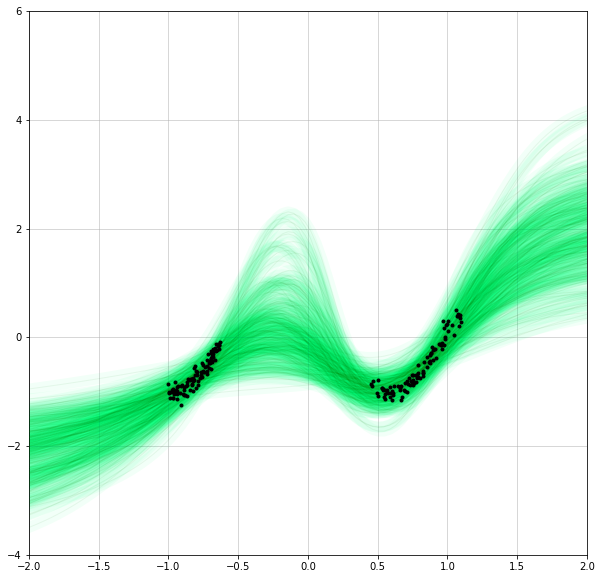

Epoch [1401/20000], Bound: 1.1555721759796143, Entropy: 75.46546936035156, Temp: 10.0, Learning Rate: 0.05
Epoch [1402/20000], Bound: 1.192270040512085, Entropy: 77.61629486083984, Temp: 10.0, Learning Rate: 0.05
Epoch [1403/20000], Bound: 1.173727035522461, Entropy: 79.16242980957031, Temp: 10.0, Learning Rate: 0.05
Epoch [1404/20000], Bound: 1.199520230293274, Entropy: 78.23654174804688, Temp: 10.0, Learning Rate: 0.05
Epoch [1405/20000], Bound: 1.2951174974441528, Entropy: 75.91948699951172, Temp: 10.0, Learning Rate: 0.05
Epoch [1406/20000], Bound: 1.290872573852539, Entropy: 79.11175537109375, Temp: 10.0, Learning Rate: 0.05
Epoch [1407/20000], Bound: 1.145115852355957, Entropy: 75.64376068115234, Temp: 10.0, Learning Rate: 0.05
Epoch [1408/20000], Bound: 1.172126054763794, Entropy: 77.8856201171875, Temp: 10.0, Learning Rate: 0.05
Epoch [1409/20000], Bound: 1.243147611618042, Entropy: 78.87454223632812, Temp: 10.0, Learning Rate: 0.05
Epoch [1410/20000], Bound: 1.1752078533172607

Epoch [1494/20000], Bound: 1.2725634574890137, Entropy: 73.96184539794922, Temp: 10.0, Learning Rate: 0.05
Epoch [1495/20000], Bound: 1.244464635848999, Entropy: 74.38906860351562, Temp: 10.0, Learning Rate: 0.05
Epoch [1496/20000], Bound: 1.2465872764587402, Entropy: 74.98162078857422, Temp: 10.0, Learning Rate: 0.05
Epoch [1497/20000], Bound: 1.1641299724578857, Entropy: 76.73517608642578, Temp: 10.0, Learning Rate: 0.05
Epoch [1498/20000], Bound: 1.3006956577301025, Entropy: 76.92008972167969, Temp: 10.0, Learning Rate: 0.05
Epoch [1499/20000], Bound: 1.2507803440093994, Entropy: 73.72282409667969, Temp: 10.0, Learning Rate: 0.05
Epoch [1500/20000], Bound: 1.2662978172302246, Entropy: 78.40272521972656, Temp: 10.0, Learning Rate: 0.05


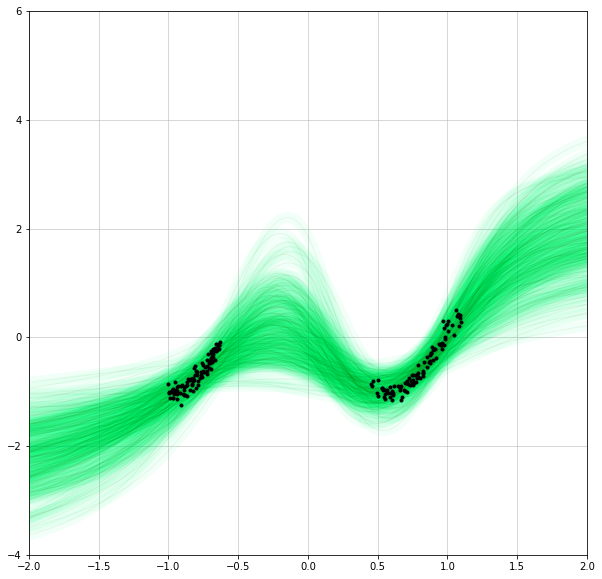

Epoch [1501/20000], Bound: 1.2197527885437012, Entropy: 72.48043060302734, Temp: 10.0, Learning Rate: 0.05
Epoch [1502/20000], Bound: 1.248875617980957, Entropy: 76.19701385498047, Temp: 10.0, Learning Rate: 0.05
Epoch [1503/20000], Bound: 1.2364356517791748, Entropy: 74.62032318115234, Temp: 10.0, Learning Rate: 0.05
Epoch [1504/20000], Bound: 1.1881568431854248, Entropy: 77.2970199584961, Temp: 10.0, Learning Rate: 0.05
Epoch [1505/20000], Bound: 1.2247755527496338, Entropy: 76.79844665527344, Temp: 10.0, Learning Rate: 0.05
Epoch [1506/20000], Bound: 1.2843986749649048, Entropy: 74.44342041015625, Temp: 10.0, Learning Rate: 0.05
Epoch [1507/20000], Bound: 1.1294004917144775, Entropy: 73.8068618774414, Temp: 10.0, Learning Rate: 0.05
Epoch [1508/20000], Bound: 1.2254847288131714, Entropy: 73.3187026977539, Temp: 10.0, Learning Rate: 0.05
Epoch [1509/20000], Bound: 1.1931240558624268, Entropy: 77.16372680664062, Temp: 10.0, Learning Rate: 0.05
Epoch [1510/20000], Bound: 1.281975746154

Epoch [1587/20000], Bound: 1.1213632822036743, Entropy: 80.82795715332031, Temp: 10.0, Learning Rate: 0.05
Epoch [1588/20000], Bound: 1.192577600479126, Entropy: 80.6297607421875, Temp: 10.0, Learning Rate: 0.05
Epoch [1589/20000], Bound: 1.1966636180877686, Entropy: 78.5682144165039, Temp: 10.0, Learning Rate: 0.05
Epoch [1590/20000], Bound: 1.1725406646728516, Entropy: 76.50704956054688, Temp: 10.0, Learning Rate: 0.05
Epoch [1591/20000], Bound: 1.1892828941345215, Entropy: 80.40778350830078, Temp: 10.0, Learning Rate: 0.05
Epoch [1592/20000], Bound: 1.142375111579895, Entropy: 80.30445861816406, Temp: 10.0, Learning Rate: 0.05
Epoch [1593/20000], Bound: 1.1220221519470215, Entropy: 82.41815185546875, Temp: 10.0, Learning Rate: 0.05
Epoch [1594/20000], Bound: 1.1437188386917114, Entropy: 80.81739044189453, Temp: 10.0, Learning Rate: 0.05
Epoch [1595/20000], Bound: 1.2354214191436768, Entropy: 78.85008239746094, Temp: 10.0, Learning Rate: 0.05
Epoch [1596/20000], Bound: 1.212344408035

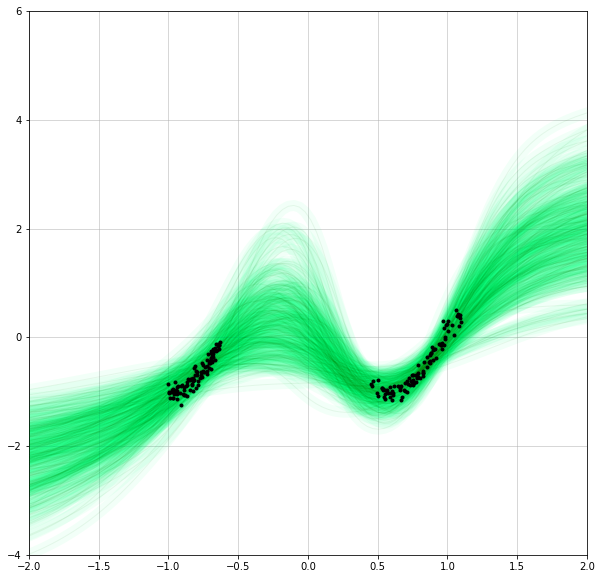

Epoch [1601/20000], Bound: 1.2220873832702637, Entropy: 83.0949478149414, Temp: 10.0, Learning Rate: 0.05
Epoch [1602/20000], Bound: 1.2188737392425537, Entropy: 81.49507904052734, Temp: 10.0, Learning Rate: 0.05
Epoch [1603/20000], Bound: 1.1768461465835571, Entropy: 83.93109893798828, Temp: 10.0, Learning Rate: 0.05
Epoch [1604/20000], Bound: 1.2139384746551514, Entropy: 82.09757995605469, Temp: 10.0, Learning Rate: 0.05
Epoch [1605/20000], Bound: 1.1428883075714111, Entropy: 81.86341857910156, Temp: 10.0, Learning Rate: 0.05
Epoch [1606/20000], Bound: 1.1294386386871338, Entropy: 80.23052215576172, Temp: 10.0, Learning Rate: 0.05
Epoch [1607/20000], Bound: 1.20163094997406, Entropy: 81.47355651855469, Temp: 10.0, Learning Rate: 0.05
Epoch [1608/20000], Bound: 1.2059097290039062, Entropy: 84.26173400878906, Temp: 10.0, Learning Rate: 0.05
Epoch [1609/20000], Bound: 1.2303285598754883, Entropy: 78.18339538574219, Temp: 10.0, Learning Rate: 0.05
Epoch [1610/20000], Bound: 1.29613101482

Epoch [1681/20000], Bound: 1.1873663663864136, Entropy: 82.3001937866211, Temp: 10.0, Learning Rate: 0.05
Epoch [1682/20000], Bound: 1.2076075077056885, Entropy: 83.01284790039062, Temp: 10.0, Learning Rate: 0.05
Epoch [1683/20000], Bound: 1.1133408546447754, Entropy: 81.74645233154297, Temp: 10.0, Learning Rate: 0.05
Epoch [1684/20000], Bound: 1.1979426145553589, Entropy: 78.39988708496094, Temp: 10.0, Learning Rate: 0.05
Epoch [1685/20000], Bound: 1.2387726306915283, Entropy: 81.83243560791016, Temp: 10.0, Learning Rate: 0.05
Epoch [1686/20000], Bound: 1.2054297924041748, Entropy: 82.07327270507812, Temp: 10.0, Learning Rate: 0.05
Epoch [1687/20000], Bound: 1.2091578245162964, Entropy: 80.0220718383789, Temp: 10.0, Learning Rate: 0.05
Epoch [1688/20000], Bound: 1.1048263311386108, Entropy: 79.846923828125, Temp: 10.0, Learning Rate: 0.05
Epoch [1689/20000], Bound: 1.0627546310424805, Entropy: 82.23757934570312, Temp: 10.0, Learning Rate: 0.05
Epoch [1690/20000], Bound: 1.234070539474

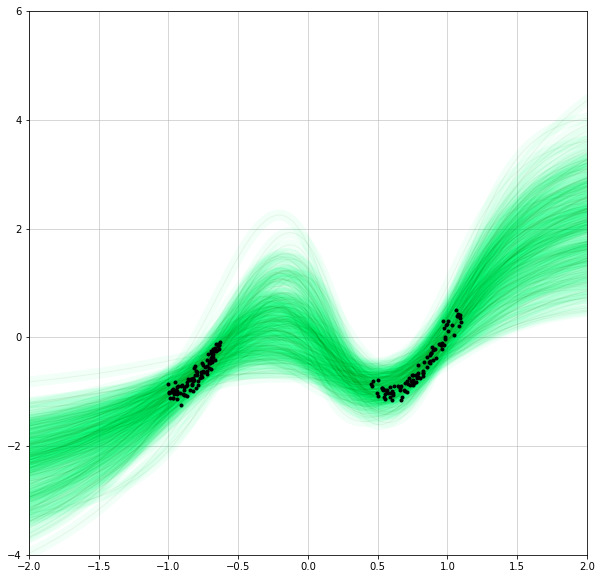

Epoch [1701/20000], Bound: 1.1713087558746338, Entropy: 81.9071273803711, Temp: 10.0, Learning Rate: 0.05
Epoch [1702/20000], Bound: 1.248366117477417, Entropy: 80.92375946044922, Temp: 10.0, Learning Rate: 0.05
Epoch [1703/20000], Bound: 1.2101378440856934, Entropy: 80.15656280517578, Temp: 10.0, Learning Rate: 0.05
Epoch [1704/20000], Bound: 1.1881978511810303, Entropy: 79.76051330566406, Temp: 10.0, Learning Rate: 0.05
Epoch [1705/20000], Bound: 1.1665962934494019, Entropy: 81.53502655029297, Temp: 10.0, Learning Rate: 0.05
Epoch [1706/20000], Bound: 1.1342763900756836, Entropy: 80.13749694824219, Temp: 10.0, Learning Rate: 0.05
Epoch [1707/20000], Bound: 1.2114417552947998, Entropy: 80.44456481933594, Temp: 10.0, Learning Rate: 0.05
Epoch [1708/20000], Bound: 1.1767644882202148, Entropy: 79.00812530517578, Temp: 10.0, Learning Rate: 0.05
Epoch [1709/20000], Bound: 1.2459087371826172, Entropy: 80.53614044189453, Temp: 10.0, Learning Rate: 0.05
Epoch [1710/20000], Bound: 1.1342206001

Epoch [1787/20000], Bound: 1.1021848917007446, Entropy: 82.24949645996094, Temp: 10.0, Learning Rate: 0.05
Epoch [1788/20000], Bound: 1.1834357976913452, Entropy: 79.7576675415039, Temp: 10.0, Learning Rate: 0.05
Epoch [1789/20000], Bound: 1.0823566913604736, Entropy: 82.64866638183594, Temp: 10.0, Learning Rate: 0.05
Epoch [1790/20000], Bound: 1.1241300106048584, Entropy: 79.45581817626953, Temp: 10.0, Learning Rate: 0.05
Epoch [1791/20000], Bound: 1.176876187324524, Entropy: 78.32289123535156, Temp: 10.0, Learning Rate: 0.05
Epoch [1792/20000], Bound: 1.1058850288391113, Entropy: 82.2613296508789, Temp: 10.0, Learning Rate: 0.05
Epoch [1793/20000], Bound: 1.1701760292053223, Entropy: 79.83561706542969, Temp: 10.0, Learning Rate: 0.05
Epoch [1794/20000], Bound: 1.0645332336425781, Entropy: 83.49427795410156, Temp: 10.0, Learning Rate: 0.05
Epoch [1795/20000], Bound: 1.1065235137939453, Entropy: 82.8359146118164, Temp: 10.0, Learning Rate: 0.05
Epoch [1796/20000], Bound: 1.124815225601

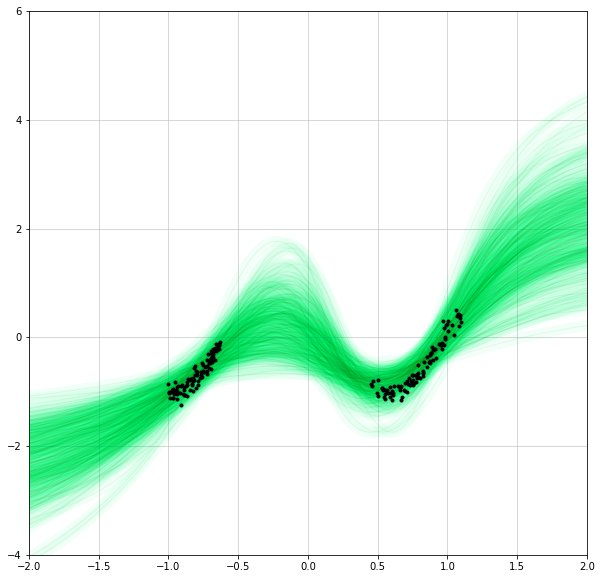

Epoch [1801/20000], Bound: 1.081606149673462, Entropy: 82.06153106689453, Temp: 10.0, Learning Rate: 0.05
Epoch [1802/20000], Bound: 1.1018140316009521, Entropy: 82.8465805053711, Temp: 10.0, Learning Rate: 0.05
Epoch [1803/20000], Bound: 1.0779681205749512, Entropy: 82.64332580566406, Temp: 10.0, Learning Rate: 0.05
Epoch [1804/20000], Bound: 1.1280555725097656, Entropy: 83.80361938476562, Temp: 10.0, Learning Rate: 0.05
Epoch [1805/20000], Bound: 1.1018190383911133, Entropy: 82.50080108642578, Temp: 10.0, Learning Rate: 0.05
Epoch [1806/20000], Bound: 1.0715242624282837, Entropy: 81.9530029296875, Temp: 10.0, Learning Rate: 0.05
Epoch [1807/20000], Bound: 1.067349910736084, Entropy: 81.607177734375, Temp: 10.0, Learning Rate: 0.05
Epoch [1808/20000], Bound: 1.1035711765289307, Entropy: 84.5009536743164, Temp: 10.0, Learning Rate: 0.05
Epoch [1809/20000], Bound: 1.1112823486328125, Entropy: 82.34669494628906, Temp: 10.0, Learning Rate: 0.05
Epoch [1810/20000], Bound: 1.142449617385864

Epoch [1884/20000], Bound: 1.32076096534729, Entropy: 78.33169555664062, Temp: 10.0, Learning Rate: 0.05
Epoch [1885/20000], Bound: 1.3874561786651611, Entropy: 77.86115264892578, Temp: 10.0, Learning Rate: 0.05
Epoch [1886/20000], Bound: 1.2134662866592407, Entropy: 78.26185607910156, Temp: 10.0, Learning Rate: 0.05
Epoch [1887/20000], Bound: 1.1450793743133545, Entropy: 77.64726257324219, Temp: 10.0, Learning Rate: 0.05
Epoch [1888/20000], Bound: 1.2421743869781494, Entropy: 78.41960144042969, Temp: 10.0, Learning Rate: 0.05
Epoch [1889/20000], Bound: 1.2453253269195557, Entropy: 76.55987548828125, Temp: 10.0, Learning Rate: 0.05
Epoch [1890/20000], Bound: 1.2103548049926758, Entropy: 79.52983856201172, Temp: 10.0, Learning Rate: 0.05
Epoch [1891/20000], Bound: 1.3698086738586426, Entropy: 78.67112731933594, Temp: 10.0, Learning Rate: 0.05
Epoch [1892/20000], Bound: 1.2744576930999756, Entropy: 76.7295150756836, Temp: 10.0, Learning Rate: 0.05
Epoch [1893/20000], Bound: 1.34123694896

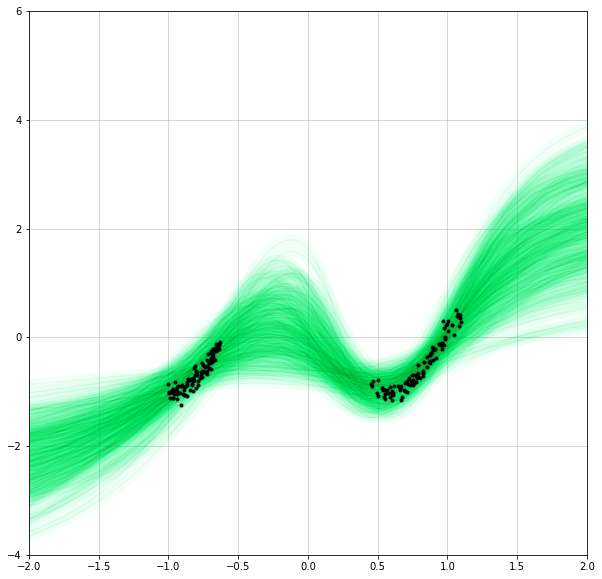

Epoch [1901/20000], Bound: 1.1984963417053223, Entropy: 76.91741180419922, Temp: 10.0, Learning Rate: 0.05
Epoch [1902/20000], Bound: 1.3287198543548584, Entropy: 76.47013854980469, Temp: 10.0, Learning Rate: 0.05
Epoch [1903/20000], Bound: 1.2274324893951416, Entropy: 75.8384780883789, Temp: 10.0, Learning Rate: 0.05
Epoch [1904/20000], Bound: 1.1776553392410278, Entropy: 77.1343765258789, Temp: 10.0, Learning Rate: 0.05
Epoch [1905/20000], Bound: 1.1684051752090454, Entropy: 77.58934020996094, Temp: 10.0, Learning Rate: 0.05
Epoch [1906/20000], Bound: 1.128568410873413, Entropy: 74.63088989257812, Temp: 10.0, Learning Rate: 0.05
Epoch [1907/20000], Bound: 1.1514430046081543, Entropy: 77.81206512451172, Temp: 10.0, Learning Rate: 0.05
Epoch [1908/20000], Bound: 1.2354741096496582, Entropy: 78.46001434326172, Temp: 10.0, Learning Rate: 0.05
Epoch [1909/20000], Bound: 1.2423495054244995, Entropy: 79.12811279296875, Temp: 10.0, Learning Rate: 0.05
Epoch [1910/20000], Bound: 1.17938458919

Epoch [1994/20000], Bound: 1.2225439548492432, Entropy: 79.76607513427734, Temp: 10.0, Learning Rate: 0.05
Epoch [1995/20000], Bound: 1.2801885604858398, Entropy: 78.29108428955078, Temp: 10.0, Learning Rate: 0.05
Epoch [1996/20000], Bound: 1.3487275838851929, Entropy: 78.09920501708984, Temp: 10.0, Learning Rate: 0.05
Epoch [1997/20000], Bound: 1.2952277660369873, Entropy: 77.77690124511719, Temp: 10.0, Learning Rate: 0.05
Epoch [1998/20000], Bound: 1.2247834205627441, Entropy: 77.02886199951172, Temp: 10.0, Learning Rate: 0.05
Epoch [1999/20000], Bound: 1.2539266347885132, Entropy: 81.58940887451172, Temp: 10.0, Learning Rate: 0.05
Epoch [2000/20000], Bound: 1.1836168766021729, Entropy: 79.04041290283203, Temp: 10.0, Learning Rate: 0.05


In [ ]:
%matplotlib inline
from tempfile import TemporaryDirectory


C=10.


#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    Z=GeN(200).detach()
    fig=setup.makePlot(Z,device)
    plt.show()
    return
    
    

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPAC(loss,logprior,n_data_samples,C,
		                                    0, 100, 1000, 50, 100,
		                                    20000, .05, .000001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch)

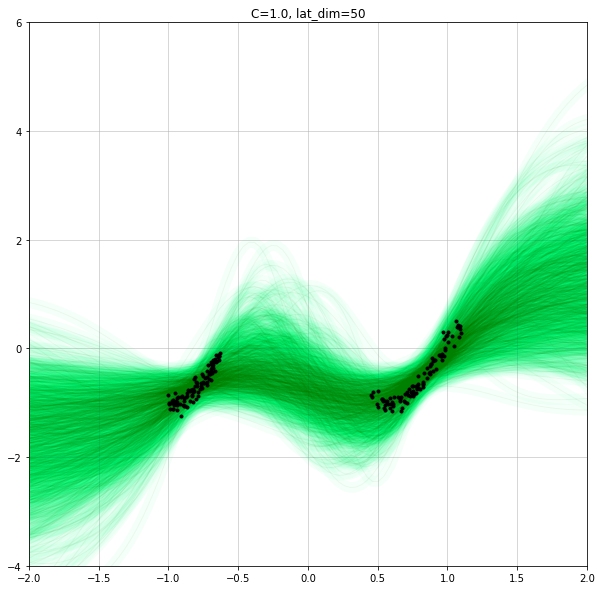

[tensor(0.0989, device='cuda:0'),
 tensor(202.4575, device='cuda:0'),
 tensor(1., device='cuda:0')]

In [95]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('C='+str(C)+', lat_dim='+str(lat_dim))
    plt.show()
    return
    

show(GeN,1000)
scores

In [83]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [84]:
print('nLPP: '+str(nLPP_test))
print('SE: '+str(RSE_test))

nLPP: (tensor(2.1772), tensor(4.9479))
SE: (tensor(0.8501), tensor(1.5213))


In [10]:

Z = GeN(1000).detach()


In [58]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=2,init='pca',perplexity=50)
X_embedded =myTSNE.fit_transform(Z)
print(myTSNE.kl_divergence_)
X_embedded.shape

0.15273454785346985


(1000, 2)

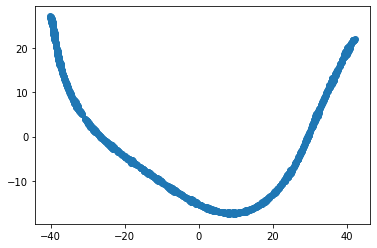

In [59]:
%matplotlib inline
plt.scatter(X_embedded[:,0],X_embedded[:,1])

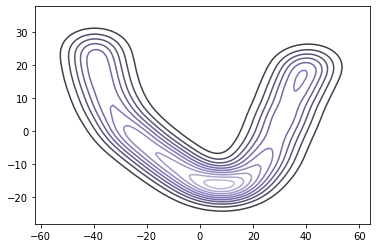

In [60]:
%matplotlib inline 
import seaborn as sns


sns.kdeplot(X_embedded[:,0],X_embedded[:,1], cmap="Purples_d")


In [56]:
from sklearn.manifold import MDS
Z=GeN(1000).detach()
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(Z)
X_transformed.shape


(1000, 2)

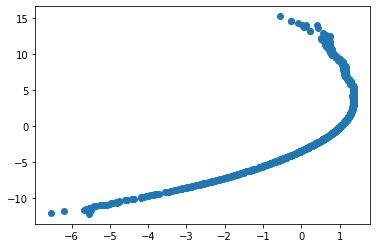

In [57]:
%matplotlib inline
plt.scatter(X_transformed[:,0],X_transformed[:,1])